In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from PIL import Image
from scipy.interpolate import CubicSpline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#connect to the site data
metsi = pd.read_csv('/content/drive/MyDrive/TAMUCC-SEU NASA Pandora-AERONET Project/SEU AERONET/Data/metsi.csv')
#connect to the site data
metsi_2023 = pd.read_csv('/content/drive/MyDrive/TAMUCC-SEU NASA Pandora-AERONET Project/SEU AERONET/Data/metsi2023.csv')

AAQ9_MY_Cheras = pd.read_csv('/content/drive/MyDrive/TAMUCC-SEU NASA Pandora-AERONET Project/SEU AERONET/Data/AAQ9_MY_Cheras.csv')

In [ ]:
metsi.head()
print(metsi.columns)


Index(['AERONET Version 3', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59'

In [ ]:
metsi = metsi.drop(metsi.index[:5])

In [ ]:
metsi_2023 = metsi_2023.drop(metsi_2023.index[:5])

In [ ]:
AAQ9_MY_Cheras = AAQ9_MY_Cheras.drop(AAQ9_MY_Cheras.index[:5])

In [ ]:
metsi.columns = metsi.iloc[0]
metsi = metsi.drop(metsi.index[0])
metsi = metsi.reset_index(drop=True)
pd.set_option('display.max_columns', None)

In [ ]:
metsi_2023.columns = metsi_2023.iloc[0]
metsi_2023 = metsi_2023.drop(metsi_2023.index[0])
metsi_2023 = metsi_2023.reset_index(drop=True)
pd.set_option('display.max_columns', None)

In [ ]:
AAQ9_MY_Cheras.columns = AAQ9_MY_Cheras.iloc[0]
AAQ9_MY_Cheras = AAQ9_MY_Cheras.drop(AAQ9_MY_Cheras.index[0])
AAQ9_MY_Cheras = AAQ9_MY_Cheras.reset_index(drop=True)
pd.set_option('display.max_columns', None)

In [ ]:
metsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 63 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Site                                                       1 non-null      object 
 1   Date(dd:mm:yyyy)                                           1 non-null      object 
 2   Time(hh:mm:ss)                                             1 non-null      object 
 3   Day_of_Year                                                1 non-null      object 
 4   Day_of_Year(Fraction)                                      1 non-null      object 
 5   0.05                                                       1 non-null      float64
 6   0.065604                                                   1 non-null      float64
 7   0.086077                                                   1 non-null      float64
 8   0.112939      

In [ ]:
AAQ9_MY_Cheras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 63 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Site                                                       3 non-null      object 
 1   Date(dd:mm:yyyy)                                           3 non-null      object 
 2   Time(hh:mm:ss)                                             3 non-null      object 
 3   Day_of_Year                                                3 non-null      object 
 4   Day_of_Year(Fraction)                                      3 non-null      object 
 5   0.05                                                       3 non-null      float64
 6   0.065604                                                   3 non-null      float64
 7   0.086077                                                   3 non-null      float64
 8   0.112939      

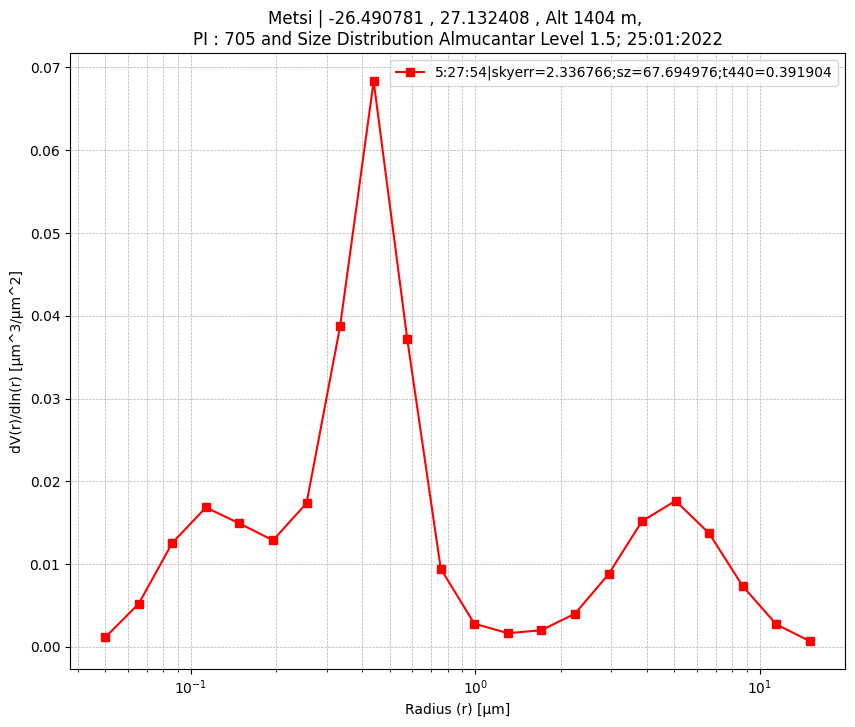

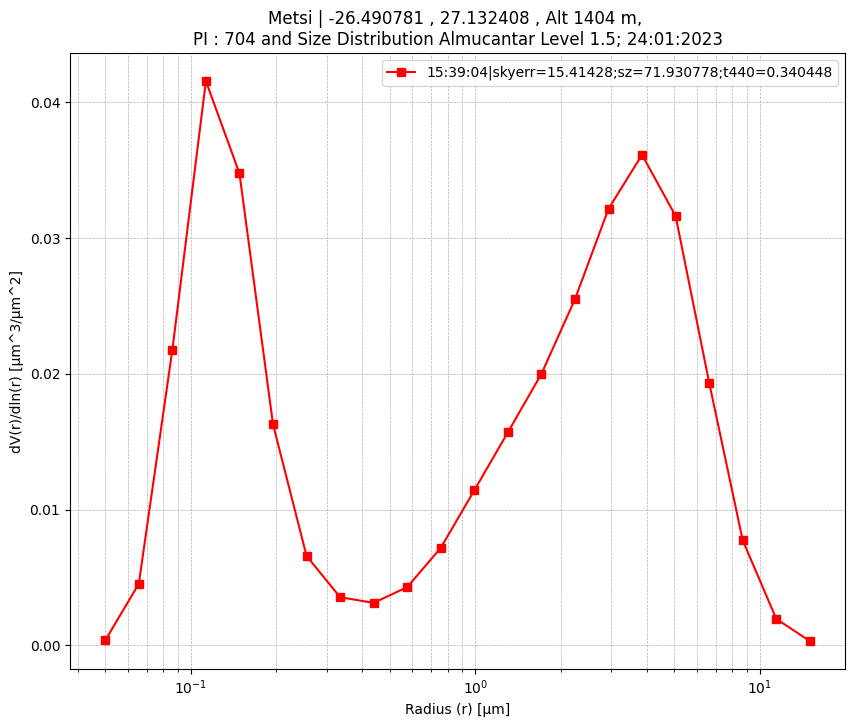

2


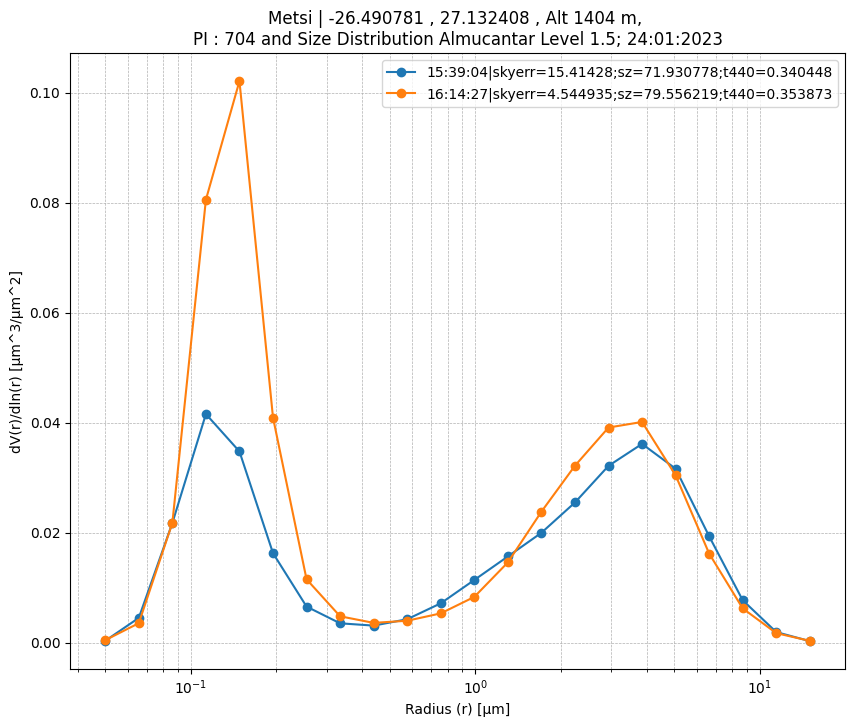

In [ ]:
#metsi site 2022
radii = metsi.columns[5:27].astype(float)
values = metsi.iloc[0, 5:27].astype(float)
plt.figure(figsize=(10, 8))
plt.plot(radii, values, 'rs-', label=f"{metsi['Time(hh:mm:ss)'][0]}|skyerr={metsi['Sky_Residual(%)'][0]};sz={metsi['Solar_Zenith_Angle_for_Measurement_Start(Degrees)'][0]};t440={metsi['Coincident_AOD440nm'][0]}")
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Radius (r) [μm]')
plt.ylabel('dV(r)/dln(r) [μm^3/μm^2]')
plt.title(f"{metsi['Site'][0]} | {metsi['Latitude(Degrees)'][0]} , {metsi['Longitude(Degrees)'][0]} , Alt {metsi['Elevation(m)'][0]} m, \nPI : {metsi['Instrument_Number'][0]} and Size Distribution Almucantar Level 1.5; {metsi['Date(dd:mm:yyyy)'][0]}")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


#metsi site 2023

radii = metsi_2023.columns[5:27].astype(float)
values = metsi_2023.iloc[0, 5:27].astype(float)

plt.figure(figsize=(10, 8))
plt.plot(radii, values, 'rs-', label=f"{metsi_2023['Time(hh:mm:ss)'][0]}|skyerr={metsi_2023['Sky_Residual(%)'][0]};sz={metsi_2023['Solar_Zenith_Angle_for_Measurement_Start(Degrees)'][0]};t440={metsi_2023['Coincident_AOD440nm'][0]}")
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Radius (r) [μm]')
plt.ylabel('dV(r)/dln(r) [μm^3/μm^2]')
plt.title(f"{metsi_2023['Site'][0]} | {metsi_2023['Latitude(Degrees)'][0]} , {metsi_2023['Longitude(Degrees)'][0]} , Alt {metsi_2023['Elevation(m)'][0]} m, \nPI : {metsi_2023['Instrument_Number'][0]} and Size Distribution Almucantar Level 1.5; {metsi_2023['Date(dd:mm:yyyy)'][0]}")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#AAQ9_MY_Cheras
radii = metsi_2023.columns[5:27].astype(float)

plt.figure(figsize=(10, 8))

print(len(metsi_2023))
for i in range(len(metsi_2023)):
    values = metsi_2023.iloc[i, 5:27].astype(float)
    plt.plot(radii, values, 'o-', label=f"{metsi_2023['Time(hh:mm:ss)'][i]}|skyerr={metsi_2023['Sky_Residual(%)'][i]};sz={metsi_2023['Solar_Zenith_Angle_for_Measurement_Start(Degrees)'][i]};t440={metsi_2023['Coincident_AOD440nm'][i]}")

plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Radius (r) [μm]')
plt.ylabel('dV(r)/dln(r) [μm^3/μm^2]')
plt.title(f"{metsi_2023['Site'][0]} | {metsi_2023['Latitude(Degrees)'][0]} , {metsi_2023['Longitude(Degrees)'][0]} , Alt {metsi_2023['Elevation(m)'][0]} m, \nPI : {metsi_2023['Instrument_Number'][0]} and Size Distribution Almucantar Level 1.5; {metsi_2023['Date(dd:mm:yyyy)'][0]}")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

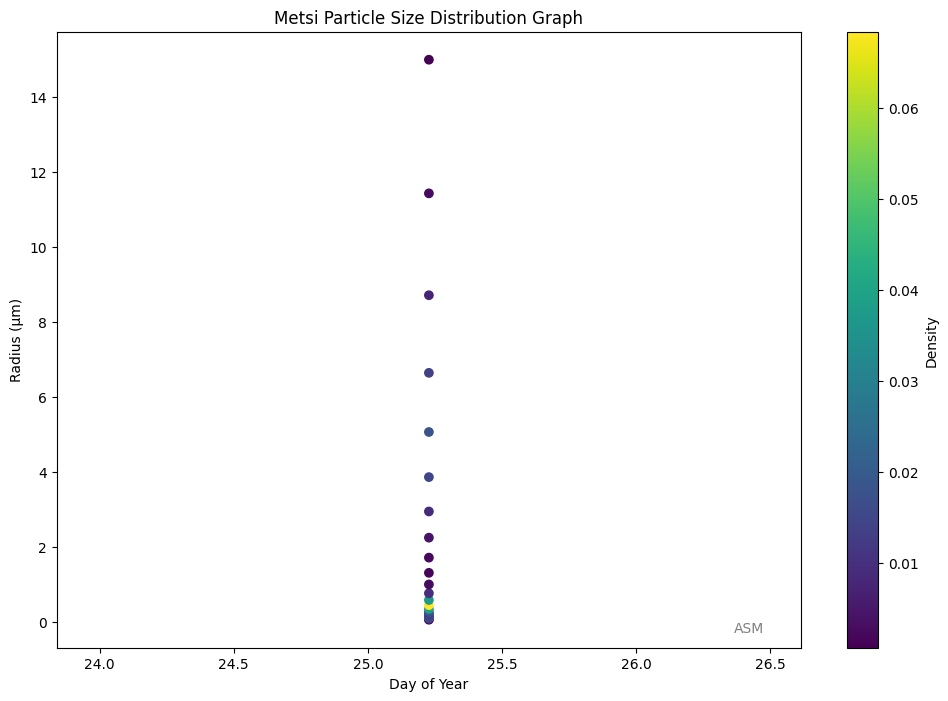

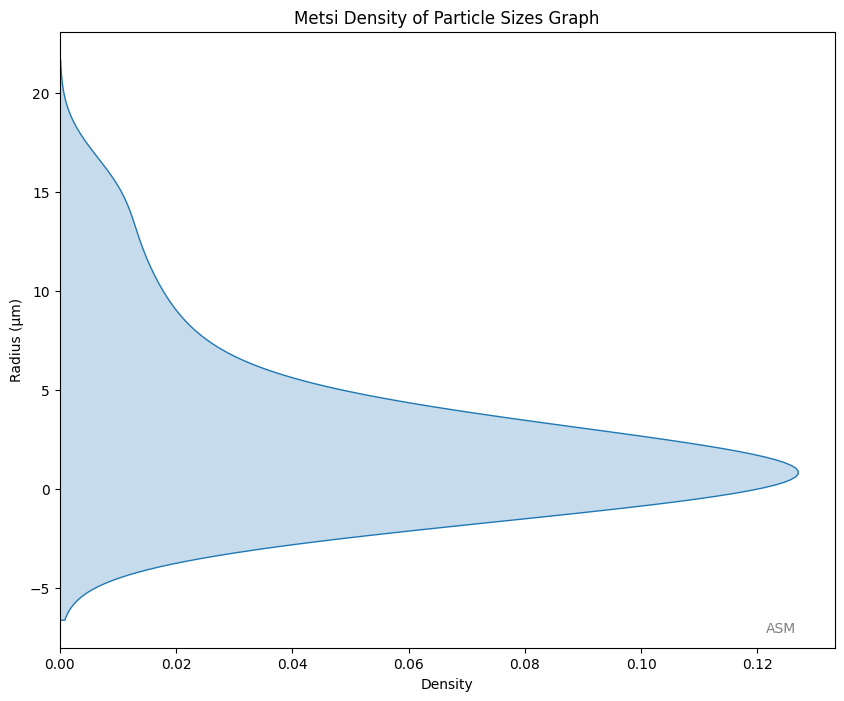

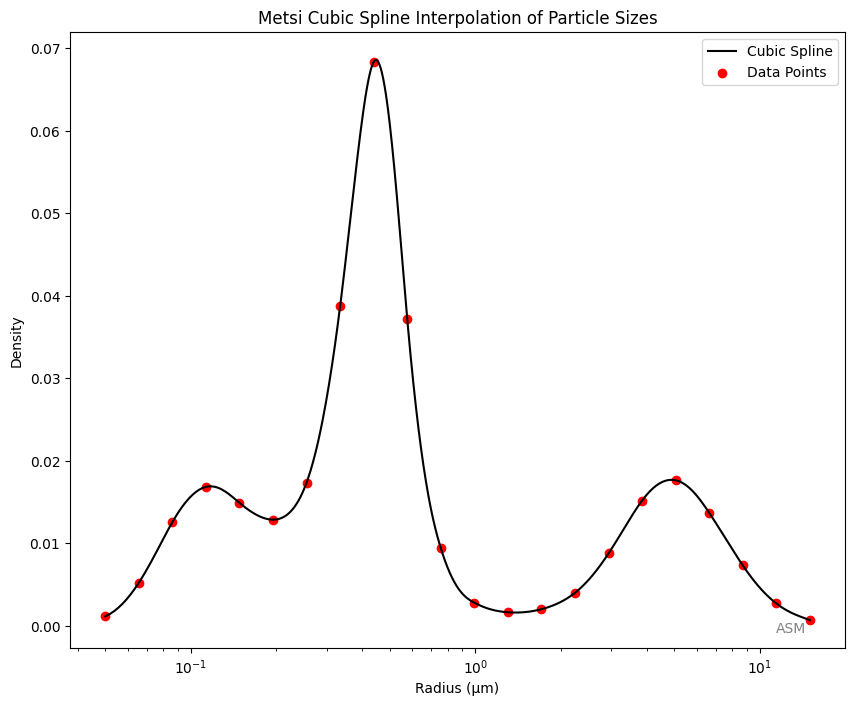

In [ ]:
# Import the seaborn library
import seaborn as sns
from scipy.signal import find_peaks

# Convert the 'Day_of_Year(Fraction)' to a numeric type
day_of_year_fraction = pd.to_numeric(metsi['Day_of_Year(Fraction)'].iloc[0], errors='coerce')
# Define particle sizes columns
particle_sizes = metsi.columns[5:27]
 # Retrieve article size values from the first row for columns 5 to 26
particle_size_values = metsi.iloc[0, 5:27].values
# Convert particle sizes to float values
radius_values = [float(col) for col in particle_sizes]
# Create a scatterplot
plt.figure(figsize=(12, 8))
plt.scatter([day_of_year_fraction] * len(radius_values), radius_values, c=particle_size_values, cmap='viridis')
#scatter plot with day_of_year_fraction on the x-axis, radius values on the y-axis, and color-coded by particle size values
# Add a color bar for density
plt.colorbar(label='Density')
plt.title(f'Metsi Particle Size Distribution Graph')
 # Label the x-axis as 'Day of Year'
plt.xlabel('Day of Year')
# Label the y-axis as 'Radius (μm)'
plt.ylabel('Radius (μm)')
plt.text(0.95, 0.02, 'ASM', fontsize=10, color='gray', ha='right', va='bottom', transform=plt.gca().transAxes)
plt.show()

# Density plot
plt.figure(figsize=(10, 8))
# density plot for the radius values with the area under the curve filled
sns.kdeplot(y=radius_values, fill=True)
# Set the plot title using the site name
plt.title(f'Metsi Density of Particle Sizes Graph')
# Label the x-axis as 'Density'
plt.xlabel('Density')
# Label the y-axis as 'Radius (μm)'
plt.ylabel('Radius (μm)')
plt.text(0.95, 0.02, 'ASM', fontsize=10, color='gray', ha='right', va='bottom', transform=plt.gca().transAxes)
plt.show()

# Cubic Spline interpolation
cs = CubicSpline(radius_values, particle_size_values)

# Generate a finer set of x-values for a smooth curve
x_fine = np.linspace(min(radius_values), max(radius_values), 8000)
y_fine = cs(x_fine)

# Plot cubic spline
plt.figure(figsize=(10, 8))
plt.plot(x_fine, y_fine, label='Cubic Spline', color='black')
plt.scatter(radius_values, particle_size_values, marker='o', color='red', label='Data Points')
plt.xscale('log')
plt.title(f'Metsi Cubic Spline Interpolation of Particle Sizes')
plt.xlabel('Radius (μm)')
plt.ylabel('Density')
plt.text(0.95, 0.02, 'ASM', fontsize=10, color='gray', ha='right', va='bottom', transform=plt.gca().transAxes)
plt.legend()
plt.show()




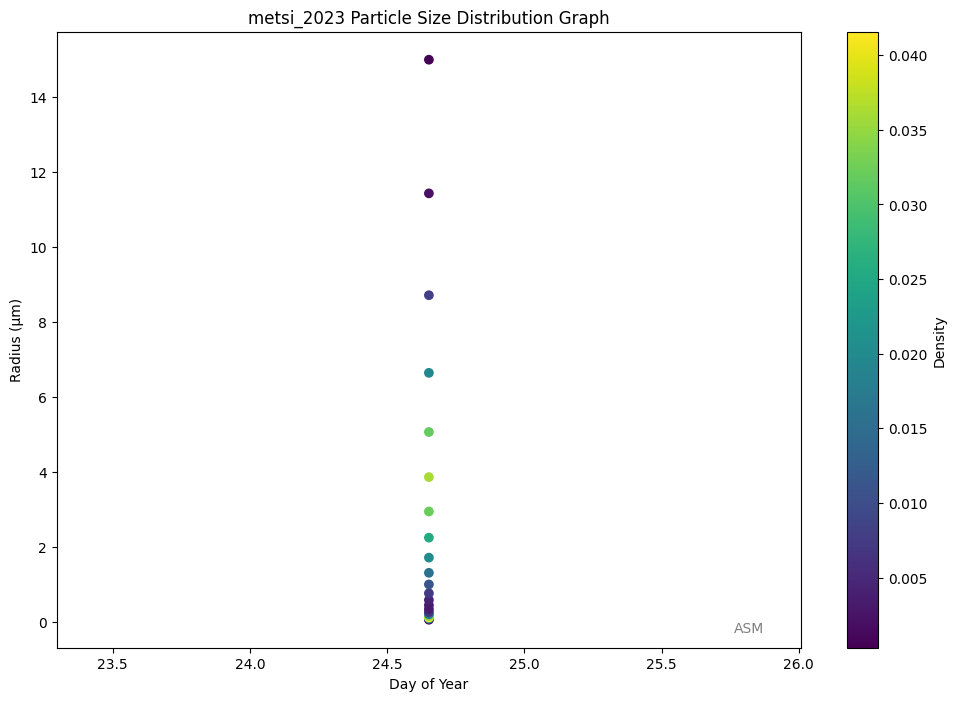

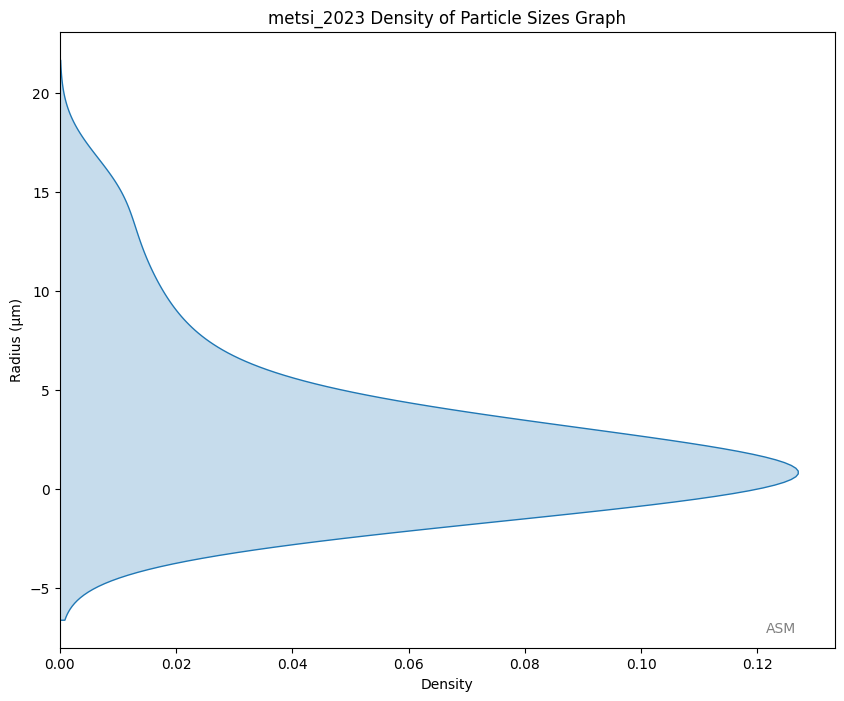

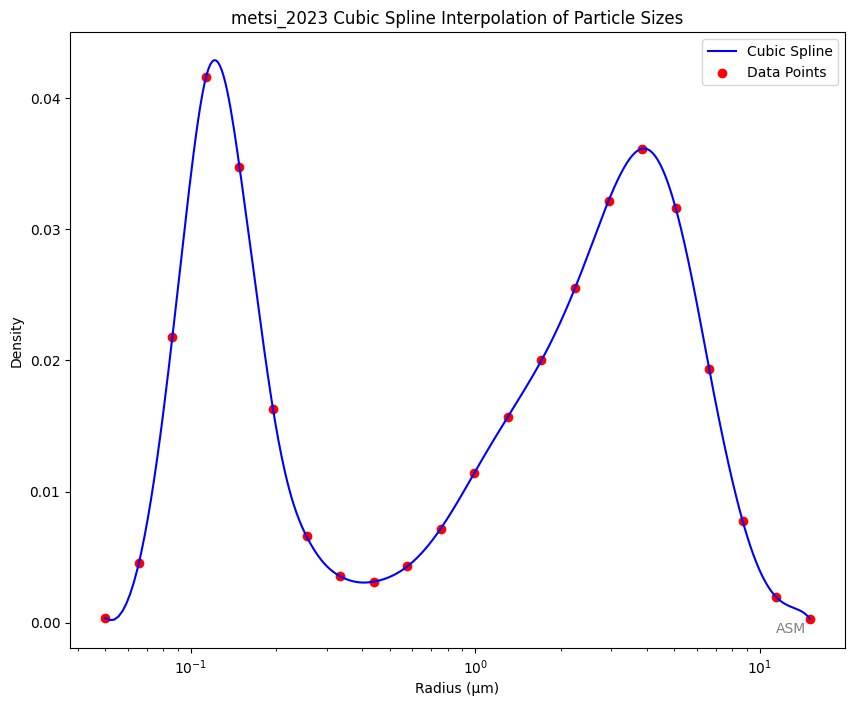

In [ ]:
#scatterplot for the 2023 Metsi
day_of_year_fraction = pd.to_numeric(metsi_2023['Day_of_Year(Fraction)'].iloc[0], errors='coerce')
particle_sizes = metsi_2023.columns[5:27]
particle_size_values = metsi_2023.iloc[0, 5:27].values
radius_values = [float(col) for col in particle_sizes]
plt.figure(figsize=(12, 8))
plt.scatter([day_of_year_fraction] * len(radius_values), radius_values, c=particle_size_values, cmap='viridis')
plt.colorbar(label='Density')
plt.title(f'metsi_2023 Particle Size Distribution Graph')
plt.xlabel('Day of Year')
plt.ylabel('Radius (μm)')
plt.text(0.95, 0.02, 'ASM', fontsize=10, color='gray', ha='right', va='bottom', transform=plt.gca().transAxes)
plt.show()

# Density plot for Metsi site data from 2023
plt.figure(figsize=(10, 8))
sns.kdeplot(y=radius_values, fill=True)
plt.title(f'metsi_2023 Density of Particle Sizes Graph')
plt.xlabel('Density')
plt.ylabel('Radius (μm)')
plt.text(0.95, 0.02, 'ASM', fontsize=10, color='gray', ha='right', va='bottom', transform=plt.gca().transAxes)
plt.show()

# Cubic Spline interpolation
cs = CubicSpline(radius_values, particle_size_values)

# Generate a finer set of x-values for a smooth curve
x_fine = np.linspace(min(radius_values), max(radius_values), 8000)
y_fine = cs(x_fine)

# Plot cubic spline
plt.figure(figsize=(10, 8))
plt.plot(x_fine, y_fine, label='Cubic Spline', color='blue')
plt.scatter(radius_values, particle_size_values, color='red', label='Data Points')
plt.title(f'metsi_2023 Cubic Spline Interpolation of Particle Sizes')
plt.xscale('log')
plt.xlabel('Radius (μm)')
plt.ylabel('Density')
plt.text(0.95, 0.02, 'ASM', fontsize=10, color='gray', ha='right', va='bottom', transform=plt.gca().transAxes)
plt.legend()
plt.show()

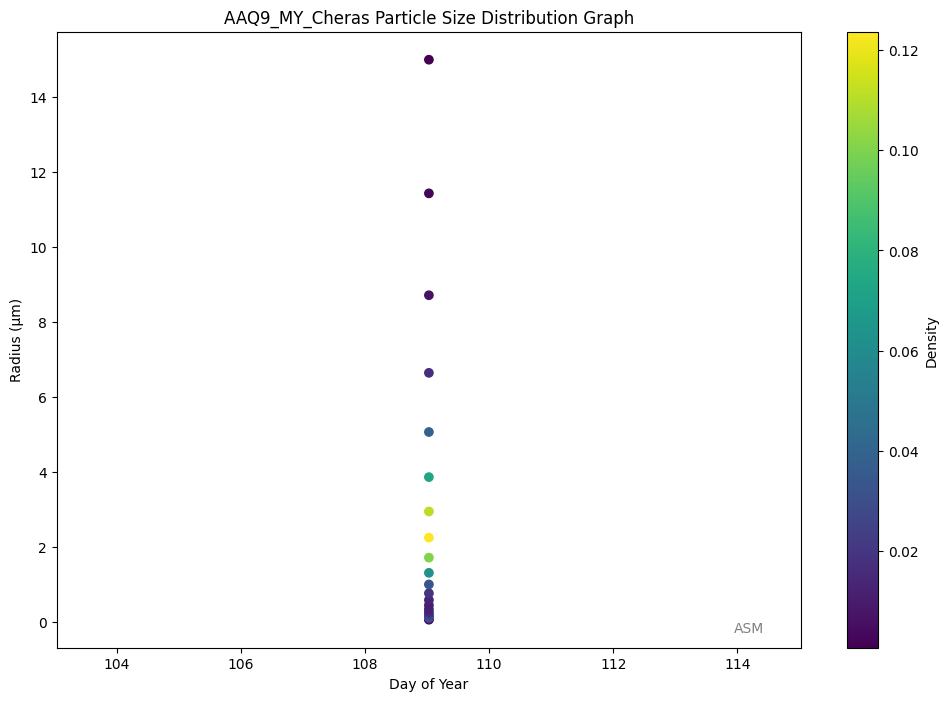

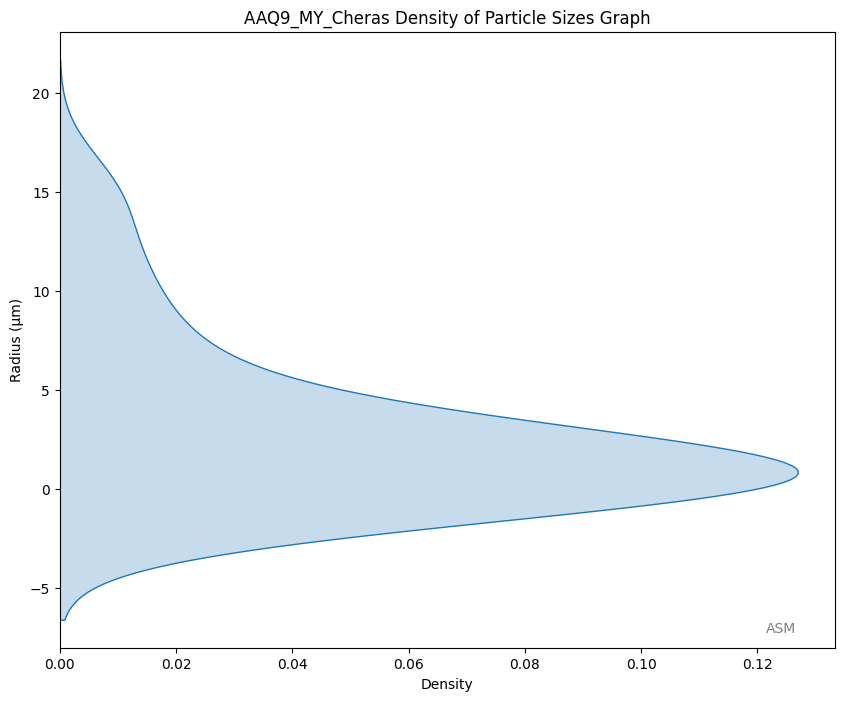

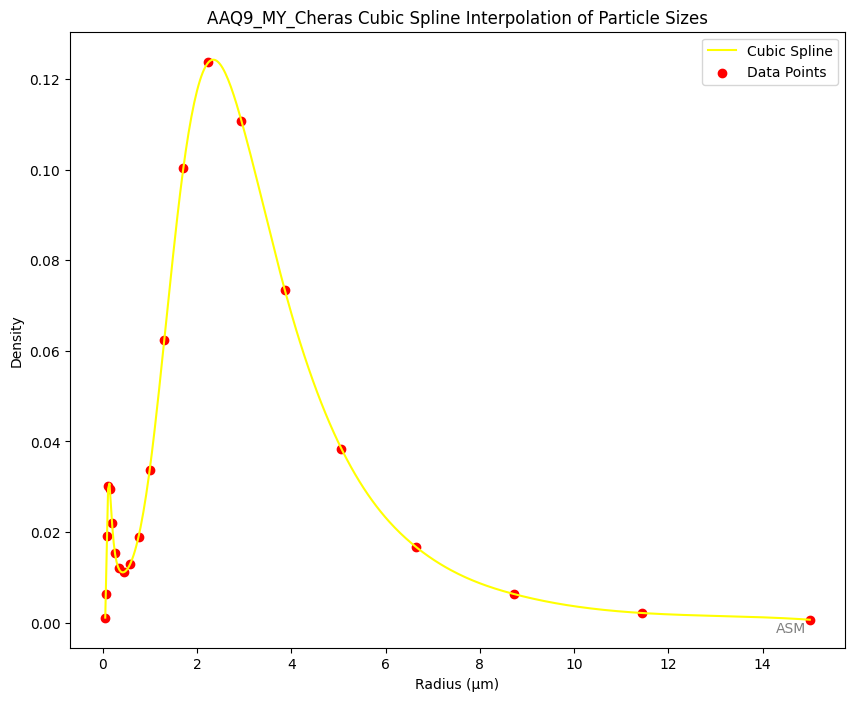

In [ ]:
#scatterplot for the 2023 Metsi
day_of_year_fraction = pd.to_numeric(AAQ9_MY_Cheras['Day_of_Year(Fraction)'].iloc[0], errors='coerce')
particle_sizes = AAQ9_MY_Cheras.columns[5:27]
particle_size_values = AAQ9_MY_Cheras.iloc[0, 5:27].values
radius_values = [float(col) for col in particle_sizes]
plt.figure(figsize=(12, 8))
plt.scatter([day_of_year_fraction] * len(radius_values), radius_values, c=particle_size_values, cmap='viridis')
plt.colorbar(label='Density')
plt.title(f'AAQ9_MY_Cheras Particle Size Distribution Graph')
plt.xlabel('Day of Year')
plt.ylabel('Radius (μm)')
plt.text(0.95, 0.02, 'ASM', fontsize=10, color='gray', ha='right', va='bottom', transform=plt.gca().transAxes)
plt.show()

# Density plot for Metsi site data from 2023
plt.figure(figsize=(10, 8))
sns.kdeplot(y=radius_values, fill=True)
plt.title(f'AAQ9_MY_Cheras Density of Particle Sizes Graph')
plt.xlabel('Density')
plt.ylabel('Radius (μm)')
plt.text(0.95, 0.02, 'ASM', fontsize=10, color='gray', ha='right', va='bottom', transform=plt.gca().transAxes)
plt.show()

# Cubic Spline interpolation
cs = CubicSpline(radius_values, particle_size_values)

# Generate a finer set of x-values for a smooth curve
x_fine = np.linspace(min(radius_values), max(radius_values), 500)
y_fine = cs(x_fine)

# Plot cubic spline
plt.figure(figsize=(10, 8))
plt.plot(x_fine, y_fine, label='Cubic Spline', color='yellow')
plt.scatter(radius_values, particle_size_values, color='red', label='Data Points')
plt.title(f'AAQ9_MY_Cheras Cubic Spline Interpolation of Particle Sizes')
plt.xlabel('Radius (μm)')
plt.ylabel('Density')
plt.text(0.95, 0.02, 'ASM', fontsize=10, color='gray', ha='right', va='bottom', transform=plt.gca().transAxes)
plt.legend()
plt.show()

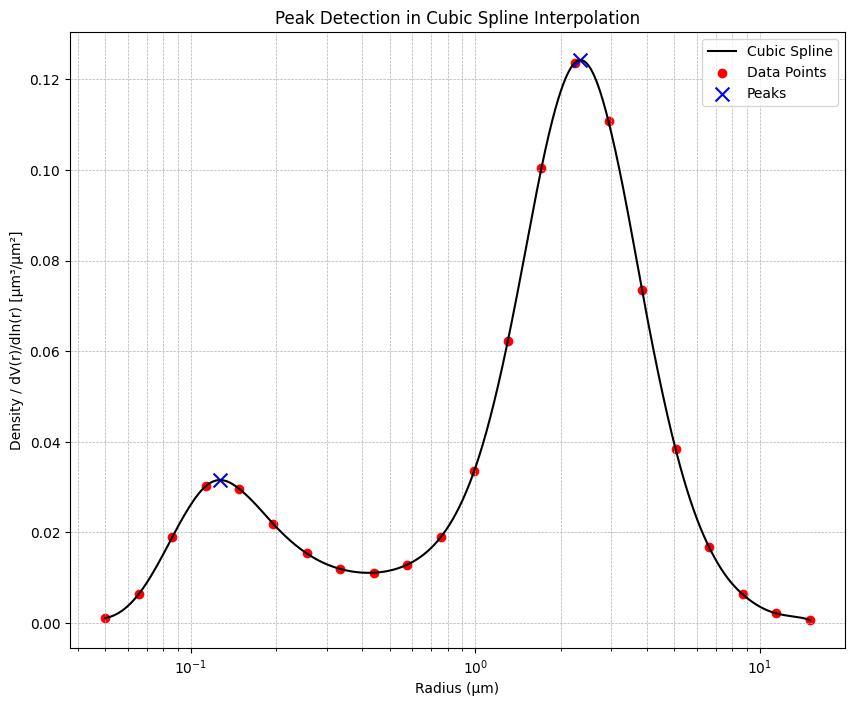

Peak at radius = 0.12663 μm with density = 0.03156
Peak at radius = 2.34324 μm with density = 0.12427


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import find_peaks


#create the cubic spline across the x axis radius and y axis particle_size_values
cs = CubicSpline(radius_values, particle_size_values)

#create 8000 evenly spaced values witin the range of the minimum and maximum radis values
x_fine = np.linspace(min(radius_values), max(radius_values), 8000)
#calculate corresponding x-value
y_fine = cs(x_fine)

# created peaks, peaks must not be less than 0.005 and have a distanceof 10 apart
peaks, _ = find_peaks(y_fine, height=0.005, distance=10, prominence=0.001)

#create the plot with the legend
plt.figure(figsize=(10, 8))
plt.plot(x_fine, y_fine, label='Cubic Spline', color='black')
plt.scatter(radius_values, particle_size_values, color='red', label='Data Points')
plt.scatter(x_fine[peaks], y_fine[peaks], color='blue', marker='x', s=100, label='Peaks')
plt.xscale('log')
plt.xlabel('Radius (μm)')
plt.ylabel('Density / dV(r)/dln(r) [μm³/μm²]')
plt.title(f"Peak Detection in Cubic Spline Interpolation")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#for loop to print loops
for peak in peaks:
    print(f"Peak at radius = {x_fine[peak]:.5f} μm with density = {y_fine[peak]:.5f}")



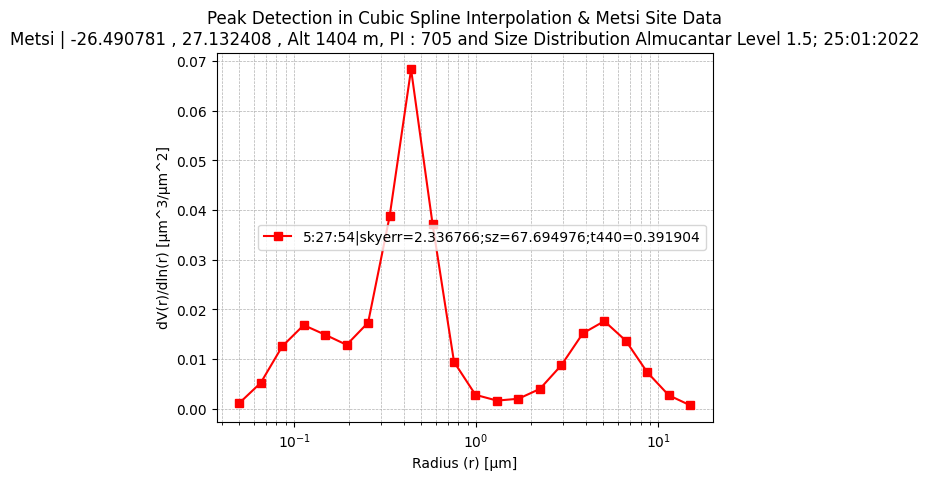

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import find_peaks



# Plot Metsi site data
radii = metsi.columns[5:27].astype(float)
values = metsi.iloc[0, 5:27].astype(float)
metsi_label = f"{metsi['Time(hh:mm:ss)'][0]}|skyerr={metsi['Sky_Residual(%)'][0]};sz={metsi['Solar_Zenith_Angle_for_Measurement_Start(Degrees)'][0]};t440={metsi['Coincident_AOD440nm'][0]}"
plt.plot(radii, values, 'rs-', label=metsi_label)

# Set plot properties
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Radius (r) [μm]')
plt.ylabel('dV(r)/dln(r) [μm^3/μm^2]')
plt.title(f"Peak Detection in Cubic Spline Interpolation & Metsi Site Data\n"
          f"{metsi['Site'][0]} | {metsi['Latitude(Degrees)'][0]} , {metsi['Longitude(Degrees)'][0]} , "
          f"Alt {metsi['Elevation(m)'][0]} m, PI : {metsi['Instrument_Number'][0]} "
          f"and Size Distribution Almucantar Level 1.5; {metsi['Date(dd:mm:yyyy)'][0]}")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


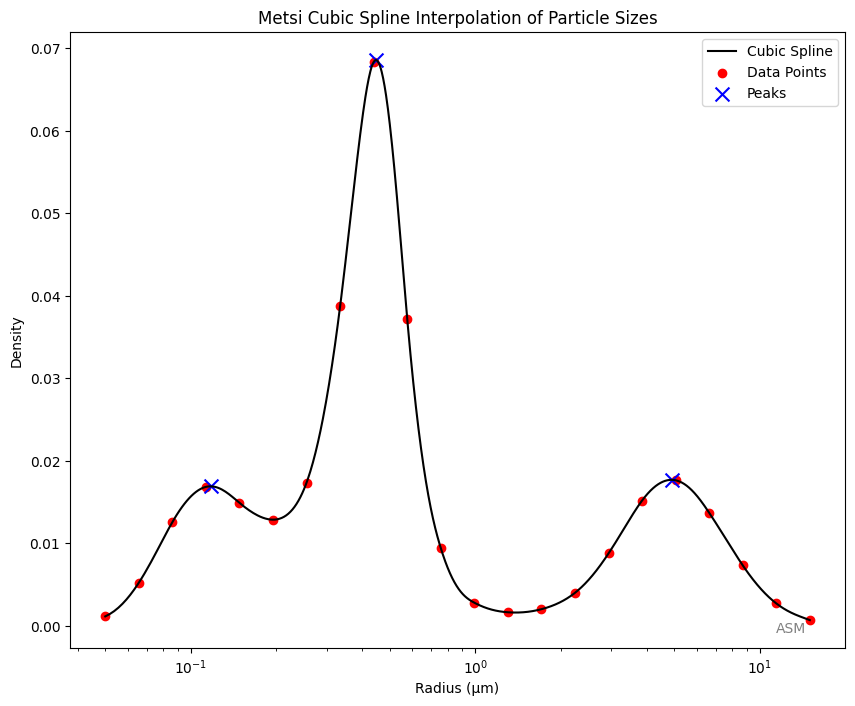

Peak at radius = 0.11728 μm with density = 0.01692
Peak at radius = 0.44809 μm with density = 0.06858
Peak at radius = 4.89627 μm with density = 0.01771


In [ ]:
# Import the seaborn library
import seaborn as sns
from scipy.signal import find_peaks


# Cubic Spline interpolation
cs = CubicSpline(radius_values, particle_size_values)

# Generate a finer set of x-values for a smooth curve
x_fine = np.linspace(min(radius_values), max(radius_values), 8000)
y_fine = cs(x_fine)

peaks,_ = find_peaks(y_fine,height=0.005, distance= 10, prominence=0.0001)

# Plot cubic spline
plt.figure(figsize=(10, 8))
plt.plot(x_fine, y_fine, label='Cubic Spline', color='black')
plt.scatter(radius_values, particle_size_values, marker='o', color='red', label='Data Points')
plt.scatter(x_fine[peaks], y_fine[peaks], color='blue', marker='x', s=100, label='Peaks')
plt.xscale('log')
plt.title(f'Metsi Cubic Spline Interpolation of Particle Sizes')
plt.xlabel('Radius (μm)')
plt.ylabel('Density')
plt.text(0.95, 0.02, 'ASM', fontsize=10, color='gray', ha='right', va='bottom', transform=plt.gca().transAxes)
plt.legend()
plt.show()

#for loop to print loops
for peak in peaks:
    print(f"Peak at radius = {x_fine[peak]:.5f} μm with density = {y_fine[peak]:.5f}")
